# Intro to Clustering

__Learning Objective__

* Explain the different types of clustering algorithms and their use cases.
* Describe the K-Means Clustering technique.
* Describe accuracy concerns for the K-Means Clustering technique.
* Explain the Hierarchical Clustering technique.
* Provide an overview of the agglomerative algorithm for hierarchical clustering.
* List the advantages and disadvantages of using Hierarchical Clustering.
* Describe the capabilities of the density-based clustering called DBSCAN.
* Apply clustering on different types of datasets.

Customse segemenation - practice of partitioning a customer base into groups that have similar characteristics (business strategy to allocate marketing resources effectively.)

Examples


Need an aanalytical approach to segmentate large curtomer datasets

Clustering for segmentation

* Most popular approach to customer segmentation
* Unsupervised ML approach
* Aim to partition customers into mutually exclusive or non-overlapping groups


What is clustering?

A _cluster_ is a group of objects that share similar features or characteristics and dissimilar features ot other objects in other groups.

What's the difference between Clustering and Classification?

Classification predict labels or values of categorical variables.
__Labeled datas__ is required for training. Supervised learning.

Culstering deals with __unlabeled data__. To group objetcs in a dataset.

_Can you explain some of the applications of clustering?_

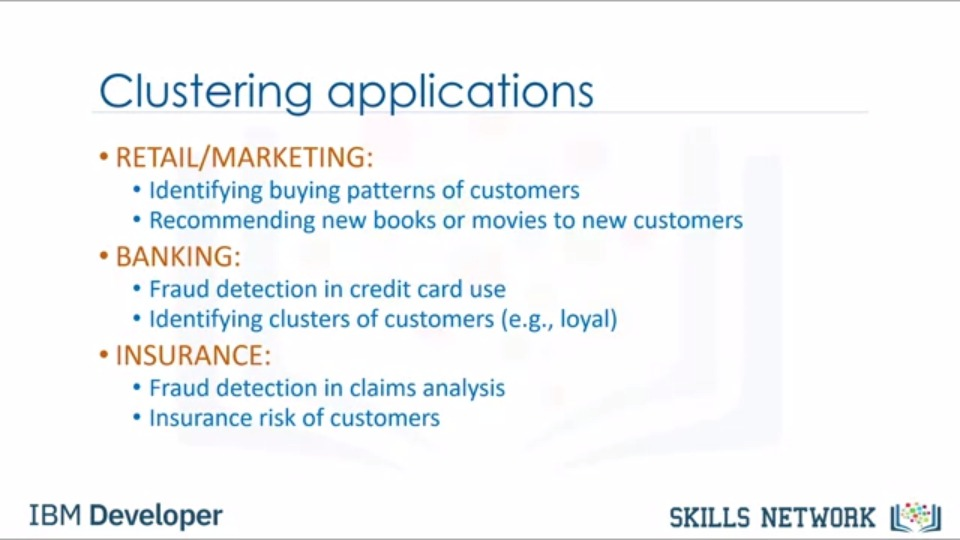


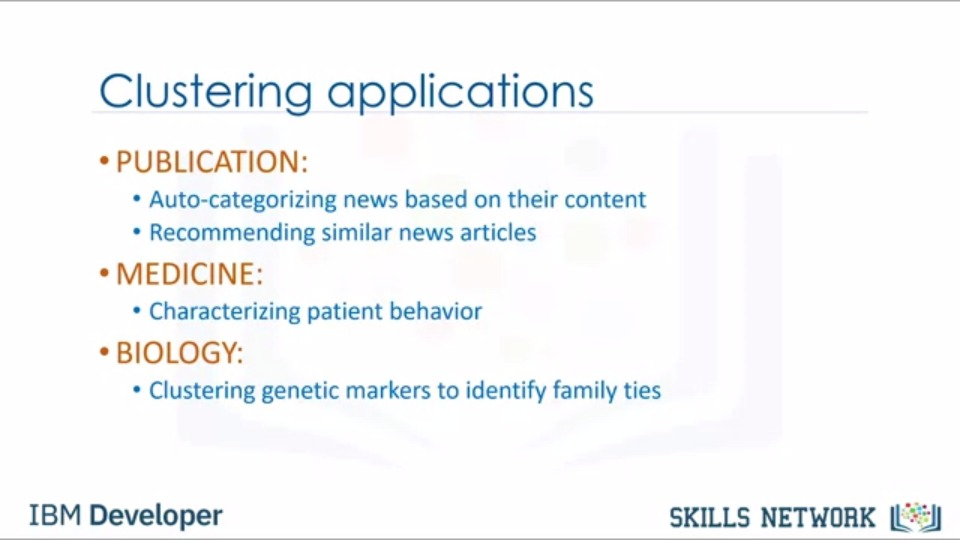

Why clustering?

* Exploatory data analysis
* Summary generation
* Outlier detection
* Finding duplicates 


Clustering algorithms

* Partitioned-based clustering
    * Relatively efficient
    * K-means, K-median, Fuzzy c-means
    * Produces spherical shaped clusters
* Hirarchical clustering
    * Produces trees of clusters
    * e.g., agglomerative, divisive
    * Good to use with small datasets
* Density-based clustering
    * Produces arbitrary shaped clusters
    * DBSCAN algorithm

# k-Means Clustering

* Parititioning clustering
* Divides data into k non-overlapping subsets or clusters without labels
* Objetcs within clusters are very similar
* Objects across different clusters are very different

What's the objective of k-means?

* We minimise the intra-cluster distance between objetcs and maximize the inter-cluster distance


* Minkowski distance (Euclidean distance would work fine)
* can be applied to multi dimensional data
* Data must be normalise our feature set
* Other dissimilarity measures: Euclidean distance, cosine similarity, average distance.

_NOTE_
* Dissimilarity measures highly control how clusters are formed
* Choosing the right measure should be based on knowledge based on your data and data type

_How does it work?_

1. Initialization
Pick a numbe of clusters k
Choose a random centre point for each cluster (_centroids_) in the feature space of the data set.
Main approachtes to this
    
    a. Pick three points from the data set at random as centroids
    b. Pick three points at random in the feature space where data lives
    
2. Distance calculation
Measure the distance from each point to each centroid accoridng to a purpose-selected metric.

Gather all the data into a _distance matrix_

3. Assign each point to the closest centroid
Usually classification will be really poor
Compute error as the sum of squared distances

4. Compute the new centroids for each cluster 
Take the empirical mean for all data points in each centre 
Then take this as the new _centroid_

5. Recluster 
Repeat iteratuvely until cluster centroids no longer move, i.e., the algorithm converges.

Caveats

This is a heuristic algorithm
The algorithm is guaranteed to converge to a result, not necessarily the optimal solution
Can be initialized with different starting conditions

## k-means accuracy

Summary of the algorithm

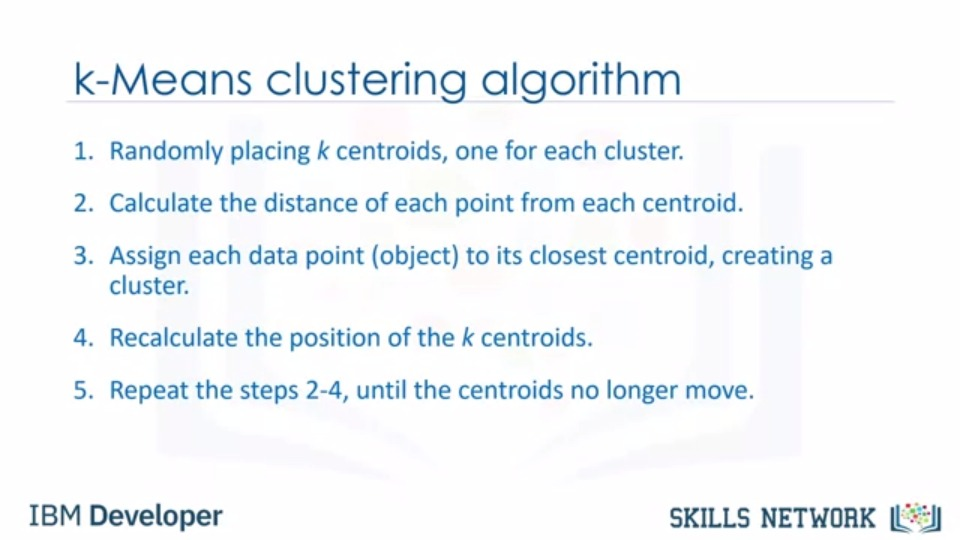

_How do we assess the goodness or the accuracy of the clustering?_

* External approach
    Cmparing the clustering classification to the ground truth, if available.
* Internal approach
    Average the distance to the centroid for data points within a cluster

Choosing k

* Frequent problems.
* Often ambiguous.
* Depends on the shape and scale of distribution of points in dataset

Usual approach to choose k

* Run the k-means for several values of k
* Look at some metric of accuracy for clustering
* But, increasing k will always reduce the error
* A workaround for this is the __elbow method__
> The right value of `k` is chosen for the `elbow point`. The point where the rate of decrease sharply shofts. 

K-means RECAP

* Great for med and large datasets
* Produces sphere-like clusters
* Drawback: need to pre-specify k, and often choosing k is not easy

## Practical 1

In [4]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # different in original NB

In [5]:
%matplotlib inline

In [6]:
np.random.seed(0)

Generate sample dataset

In [7]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

This as generated assuming
* 5000 data points
* $k=4$ in a 2D feature space
* and fixed cluster `std`
* `y` is the response variable (ground truth)

In [12]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [13]:
y

array([1, 2, 2, ..., 0, 1, 1])

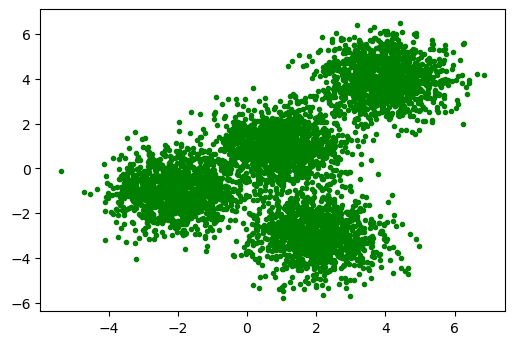

In [16]:
fig = plt.figure(dpi=100)
plt.scatter(X[:,0], X[:,1], marker='.', color='green')
plt.show()

Set up the model

In [17]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

* `init` is the initialization method. Here `k-means++`, which selects cluster centres of k-means clustering in a smart way to speed up convergence. 
* `n_clusters` number of centroids
* `n_init` is the number of times k-means will be run with different centroid seeds.

In [18]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [19]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [20]:
k_means_centers = k_means.cluster_centers_
k_means_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

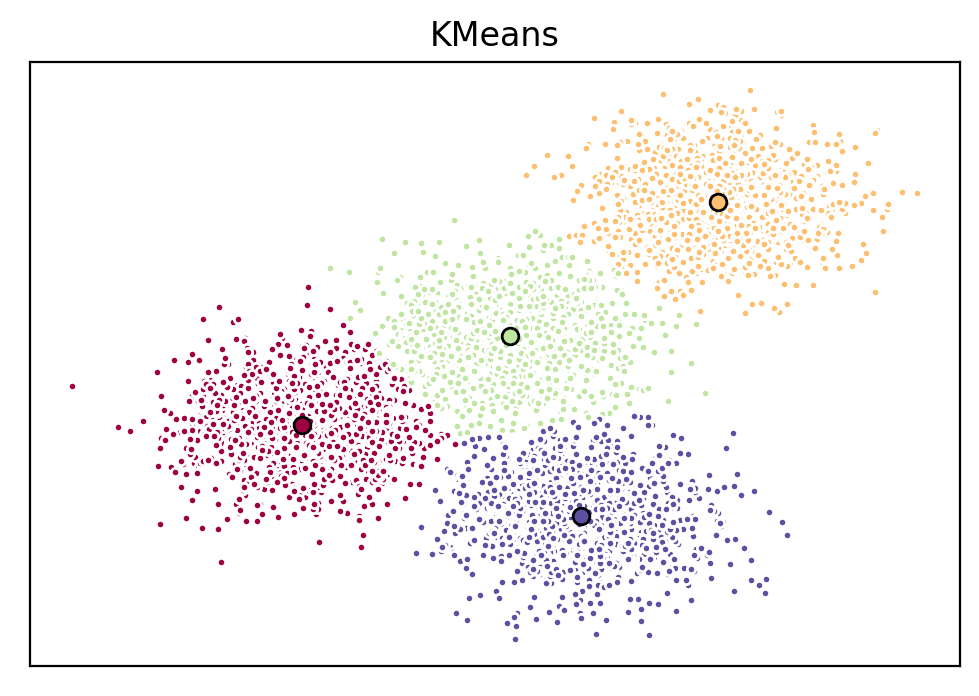

In [23]:
fig, ax  = plt.subplots(1,1,figsize=(6, 4), dpi=200)

colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means_labels))))

for k, col in zip(range(4), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_centers[k]
    # plot data points
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    # plot centroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

## Further practice

Assume 3 clusters instead of 4

In [24]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)

In [26]:
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_centers = k_means.cluster_centers_

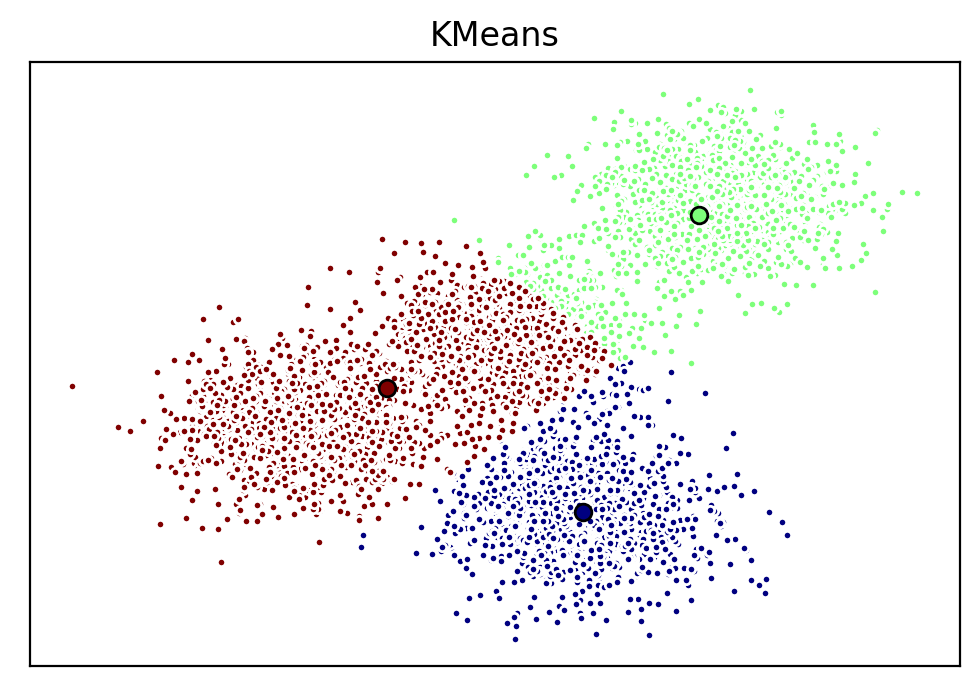

In [28]:
fig, ax  = plt.subplots(1,1,figsize=(6, 4), dpi=200)

colors = plt.cm.jet(np.linspace(0,1, len(set(k_means_labels))))

for k, col in zip(range(3), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_centers[k]
    # plot data points
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    # plot centroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

## Customer segmentation

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("Cust_Segmentation.csv")

In [32]:
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

Preprocessing

<span style="color:red"><b>NOTE</b></span> Note that __Address__ is a categorical variable. The k-means algorithm is not directly applicable to categorical vairables because the Euclidean disntace isn't really meaningful for discrete variables. 

We drop this variable

In [33]:
df = df.drop("Address", axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

Normalize data over standard deviation

<span style="color:red"><b>NOTE</b></span> Why do we need normalization?
Normalization helps algorithms to interpret featires with different magnitudes and distributions equally (?). 

We use `StandardScale()` for this.

In [34]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

Modelling

In [35]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(X)
labels = k_means.labels_

In [36]:
labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [37]:
df["Clus_km"] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        0  
1        0.0             12.8        2  
2        1.0             20.9        0  
3        0.0              6.3        0  
4        0.0              7.2        1

We can check the cluster centroids

In [38]:
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         432.468413  32.964561  1.614792        6.374422   31.164869   
1         410.166667  45.388889  2.666667       19.555556  227.166667   
2         402.295082  41.333333  1.956284       15.256831   83.928962   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         1.032541    2.104133   0.285185        10.094761  
1         5.678444   10.907167   0.285714         7.322222  
2         3.103639    5.765279   0.171233        10.724590

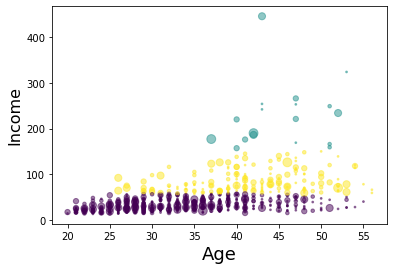

In [40]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

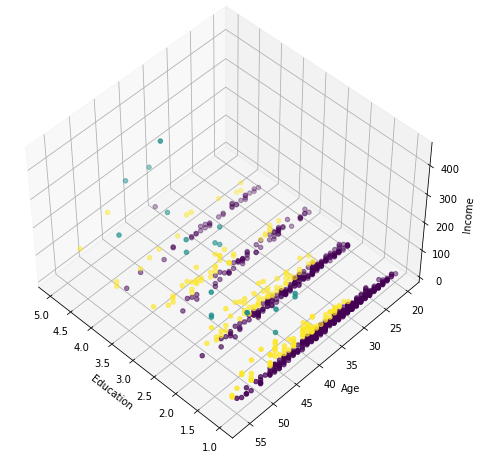

In [42]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))


# Intro to Hierarchical Clustering

<span style="color:red">Why do we need hierarchical clustering?</span>


Ways to construct a hierarchical cluster

* Divisive (Top-down)
A cluster is broken down into smaller clusters

* Agglomerative (Bottom up)
Pairs of clusters are merged together
MORE POPULAR amongst data scientists.


Which citites do we first merge into a cluster?

* We construct a distance matrix for all individual cities (leave clusters).

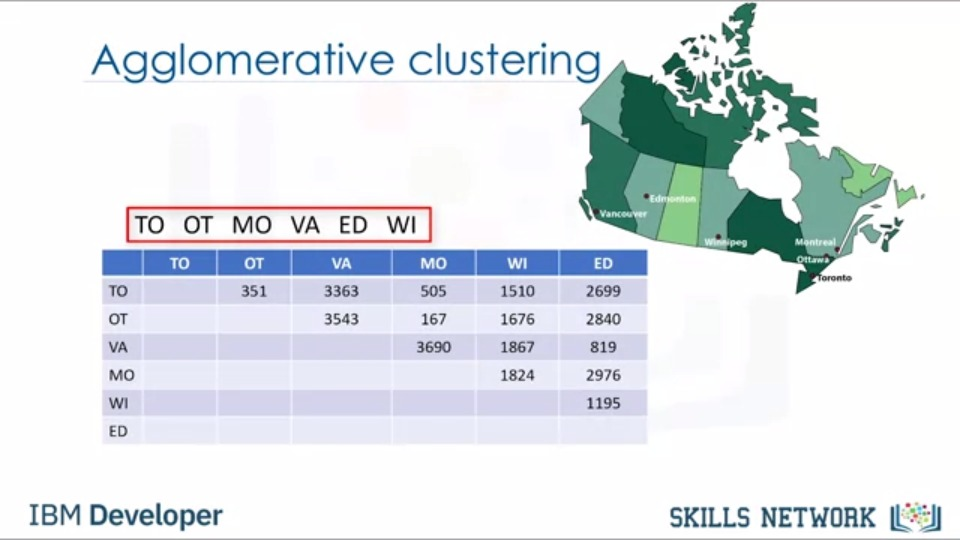

* Then, we merge the two citites with the lowest distance into one single cluster.

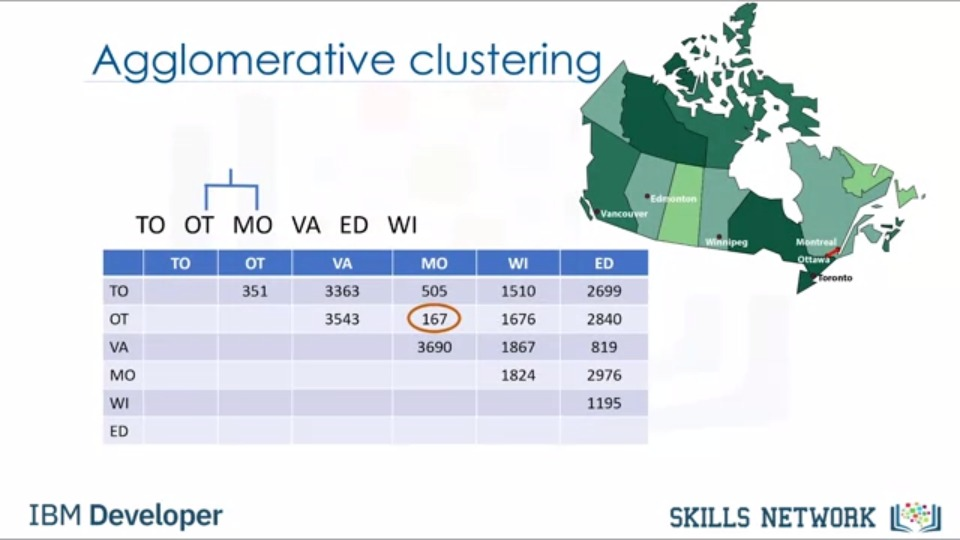

* Next, we calculate the distance from each city to this newly formed cluster, and we update the distance matrix.

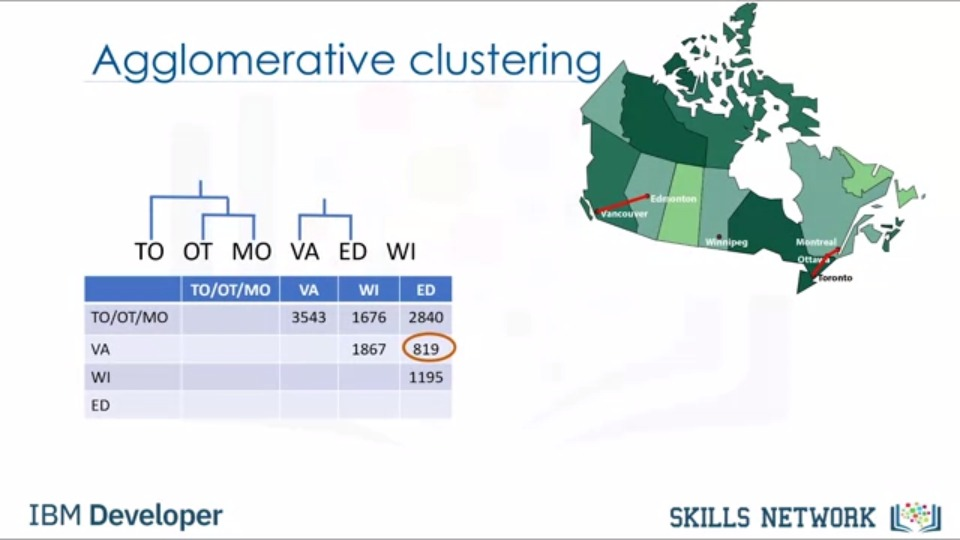

* The distances between each city and the centre of the cluster (mid point between the centres of the two city cluster).

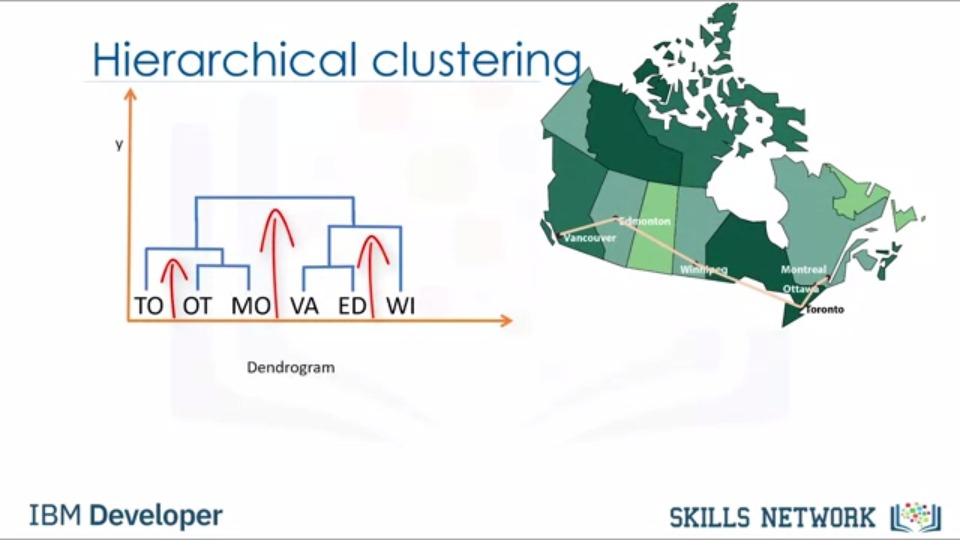

* We repeat the process until we obtain one single cluster

_NOTE_ Here Euclidean distance was used, however, other distance metrics can be employed depending on the data type or domain knowledge, e.g., Average distance, Pearson distance  (EXAMPLE?)

_NOTE_ A hierarchical cluster is typically represented as a _dendrogram_, each merges is represented by horizontal lines, the vertical position indicates the similarity of the two clusters that were merged. The dendogram allows to reconstruct the history of merges.

Hierarchical clustering: agglomerative algorithm

* We start by consideirng every point in a dataset as a single cluster
* We compute the _Distance Proximity Matrix_ ($n \times n$ table)
* Repeat 
    * Merge two closest clusters
    * Update the proximity matrix (represent as dendogram)
* Until one sinfle cluster remains


Key questions

* How do we measure the distance between clusters when each cluster has several objects?
* How do we find the nearest amongst clusters?
* Which points do we choose?

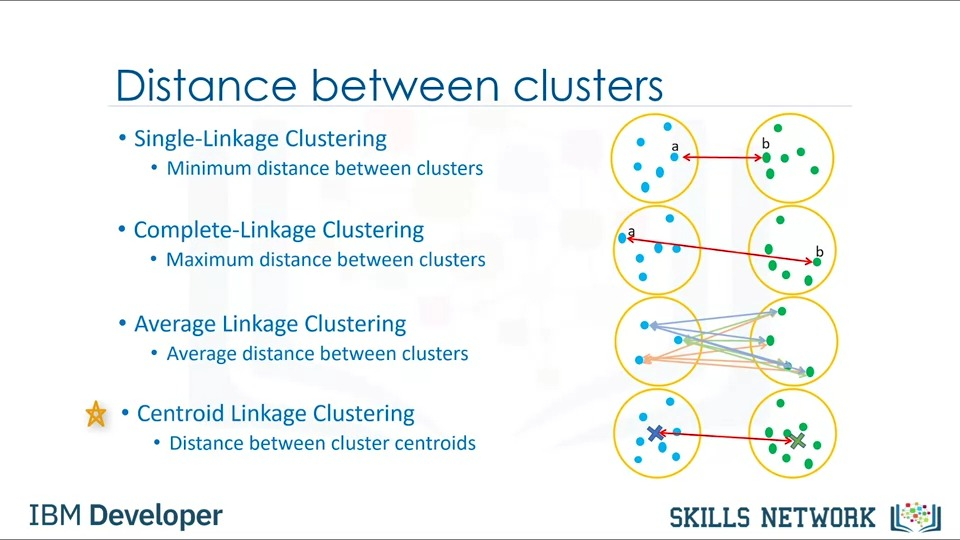

ADVANTAGES AND DISADVANTAGES of Hierarchical clustering

| Pros   | Cons |
| :-----------: | :-----------: |
| No need to pre-specify number of clusters      | Cannot undo merging steps, if bad choice of initial clusters |
| Easy to compute and implement   | But generally long runtimes        |
| Can visualise clusters with a dendogram which helps understanding the data      |  Sometimes difficult to identidy number of clusters in dendrogram if large datasets  |

K-MEANS CLUSTERING vs HIERARCHICAL CLUSTERING

| K-means   | HC |
| :-----------: | :-----------: |
| Needs to specify number of clusters | No need to require number of clusters |
| Returns a fixed partition of data      | Several partitions of data       |
| Computationally more efficient for large data sets   | Slow and computationally expensive  |
| Can return different clusters depending on random centroid initialization |  Always returns same cluster  |

## Practical 1

<span style="color:red">Why is agglomerative clusteing more popular than divisive clustering?</span>

<span style="color:red">Can top-down (divisive) and bottom-up (agglomerative) clustering return the same cluster?</span>

Cluster distance: Complete linkage

NOTE: `sklearn.datasets.samples_generator` depricated

In [40]:
import numpy as np
import pandas as pd

from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from matplotlib import pyplot as plt 

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

Create sample dataset

In [21]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

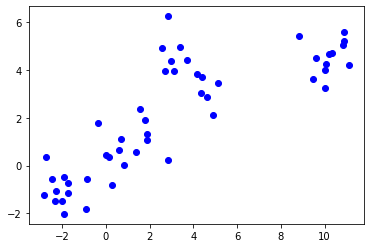

In [22]:
plt.scatter(X1[:,0], X1[:,1], color="blue", marker='o')

Model set up

In [23]:
agglom = AgglomerativeClustering(n_clusters=4, linkage="average")

In [24]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

Plot data

([], <a list of 0 Text major ticklabel objects>)

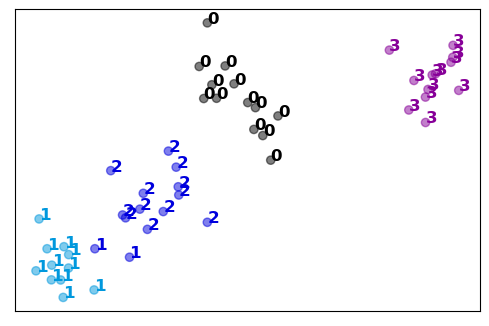

In [44]:
fig = plt.figure(dpi=100)

# Normalize data to unit square [0,1]x[0,1]
x_min, x_max = X1.min(axis=0), X1.max(axis=0)
X1 = (X1 - x_min)/(x_max - x_min)

colors = plt.cm.nipy_spectral(agglom.labels_/10)

for i in range(len(X1)):
    plt.text(X1[i,0], X1[i,1], y1[i], color=colors[i], fontdict={'weight': 'bold', 'size': 12})

plt.scatter(X1[:,0], X1[:,1], color=colors, marker='o', alpha=0.5)

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

Distance matrix

In [46]:
dist_matrix = distance_matrix(X1, X1)
dist_matrix

array([[0.        , 0.1379747 , 0.96043984, ..., 0.96173596, 0.45685148,
        0.62611336],
       [0.1379747 , 0.        , 1.09757779, ..., 1.09963292, 0.57365056,
        0.76404857],
       [0.96043984, 1.09757779, 0.        , ..., 0.14759944, 0.60774227,
        0.34175037],
       ...,
       [0.96173596, 1.09963292, 0.14759944, ..., 0.        , 0.66827987,
        0.3390887 ],
       [0.45685148, 0.57365056, 0.60774227, ..., 0.66827987, 0.        ,
        0.36345034],
       [0.62611336, 0.76404857, 0.34175037, ..., 0.3390887 , 0.36345034,
        0.        ]])

Hierarchical linkage

In [48]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


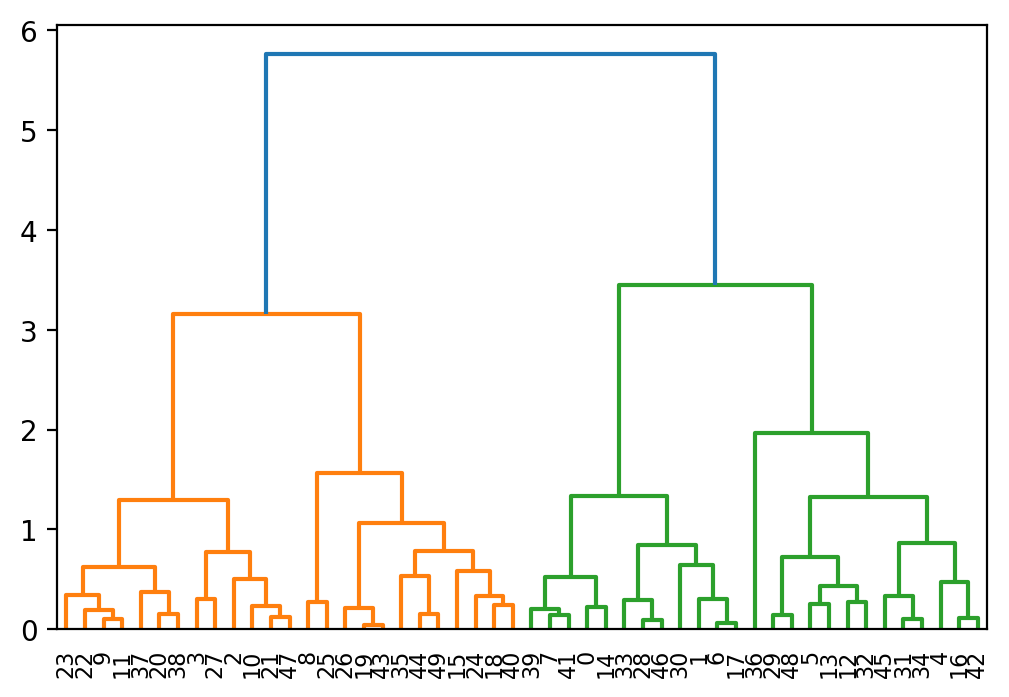

In [55]:
fig = plt.figure(dpi=200)
dendro = hierarchy.dendrogram(Z)

_RECALL_ The y-position or the vertical position of horizontal lines represent the similarity between the clusters that were merged. Points in the dataset are considered as single clusters. 

## Practical 2

Repeat the same as above but with `average` linkage. Compare how the dendrogram changes. 

In [60]:
Z = hierarchy.linkage(dist_matrix, "average")

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


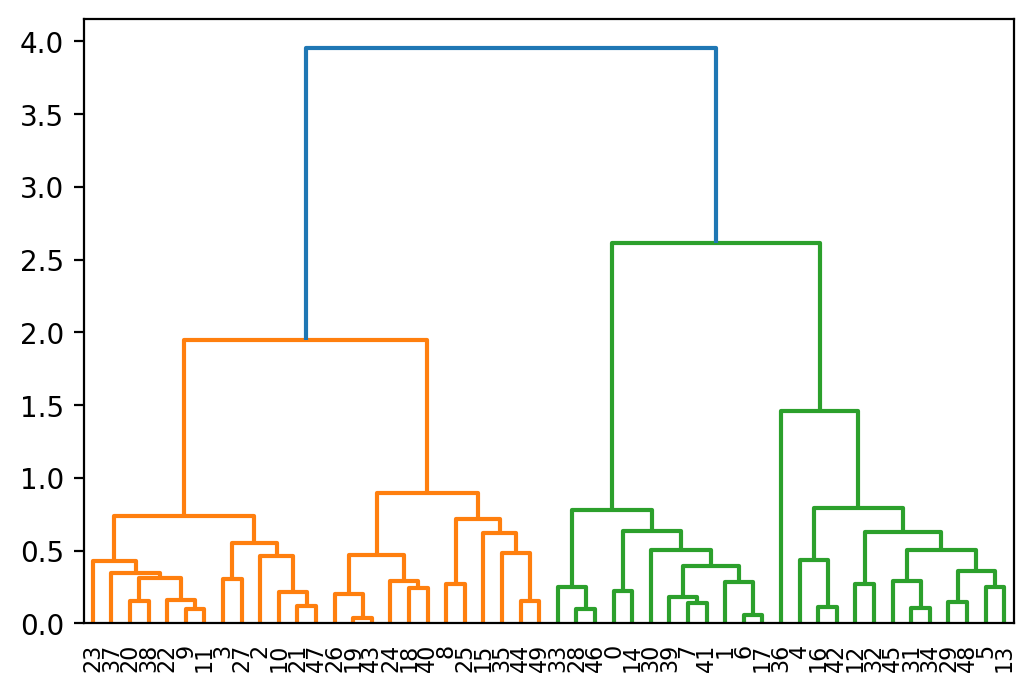

In [62]:
fig = plt.figure(dpi=200)
dendro = hierarchy.dendrogram(Z)

OBSERVATION: Many of the leave clusters are preserved in comparison to the complete-linkage dendrogram. However, the order in which leave clusters is presented has been changed. 

NEXT : Clustering on Vehicle dataset

## Practical 3

__PROBLEM SETUP__

A car manufacturer has produced prototypes for new models.

However, before introducing these into its line of models for sale, first it needs to determine how these potential models compare with existing ones on the market.

To determine which of these models will compete against its prototypes based on their similarity.

The manufacturer has gathered several features that describe several models.

### Data loading and exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cars_clus.csv")
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [3]:
df.head(10)

manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   
5     Audi       A6  18.780  23.555  0.000  33.950    2.800  200.000  108.700   
6     Audi       A8   1.380  39.000  0.000  62.000    4.200  310.000  113.000   
7      BMW     323i  19.747  $null$  0.000  26.990    2.500  170.000  107.300   
8      BMW     328i   9.231  28.675  0.000  33.400    2.800  193.000  107.300   
9      BMW     528i  17.527  36.125  0.000  38.900    2.800  193.000  111.400   

    width   length curb_wgt fuel_cap     mpg lnsales  partition  
0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
4  68.200  178.000    2.998   16.400  27.000   3.015        0.0  
5  76.100  192.000    3.561   18.500  22.000   2.933        0.0  
6  74.000  198.200    3.902   23.700  21.000   0.322        0.0  
7  68.400  176.000    3.179   16.600  26.100   2.983        0.0  
8  68.500  176.000    3.197   16.600  24.000   2.223        0.0  
9  70.900  188.000    3.472   18.500  24.800   2.864        0.0

In [4]:
df.shape

(159, 16)

However, the data needs some pre-processing as the above data has non-valid entries.

### Preprocessing

In [5]:
action = pd.to_numeric

In [6]:
columns_selected = list(df.columns)[2:-1] # exclude last column
columns_selected

['sales',
 'resale',
 'type',
 'price',
 'engine_s',
 'horsepow',
 'wheelbas',
 'width',
 'length',
 'curb_wgt',
 'fuel_cap',
 'mpg',
 'lnsales']

<span style="color:red">__NOTE__</span> Make sure to exclude all categorical variables. Otherwise, later on after dropping `NaN` values all rows will be deleted as values of categorical variables are by default turned into `NaN`.

In [7]:
data_to_process = df[columns_selected]
data_processed = data_to_process.apply(action, errors="coerce")
data_processed.head(10)

sales  resale  type  price  engine_s  horsepow  wheelbas  width  length  \
0  16.919  16.360   0.0  21.50       1.8     140.0     101.2   67.3   172.4   
1  39.384  19.875   0.0  28.40       3.2     225.0     108.1   70.3   192.9   
2  14.114  18.225   0.0    NaN       3.2     225.0     106.9   70.6   192.0   
3   8.588  29.725   0.0  42.00       3.5     210.0     114.6   71.4   196.6   
4  20.397  22.255   0.0  23.99       1.8     150.0     102.6   68.2   178.0   
5  18.780  23.555   0.0  33.95       2.8     200.0     108.7   76.1   192.0   
6   1.380  39.000   0.0  62.00       4.2     310.0     113.0   74.0   198.2   
7  19.747     NaN   0.0  26.99       2.5     170.0     107.3   68.4   176.0   
8   9.231  28.675   0.0  33.40       2.8     193.0     107.3   68.5   176.0   
9  17.527  36.125   0.0  38.90       2.8     193.0     111.4   70.9   188.0   

   curb_wgt  fuel_cap   mpg  lnsales  
0     2.639      13.2  28.0    2.828  
1     3.517      17.2  25.0    3.673  
2     3.470      17.2  26.0    2.647  
3     3.850      18.0  22.0    2.150  
4     2.998      16.4  27.0    3.015  
5     3.561      18.5  22.0    2.933  
6     3.902      23.7  21.0    0.322  
7     3.179      16.6  26.1    2.983  
8     3.197      16.6  24.0    2.223  
9     3.472      18.5  24.8    2.864

Redefine dataframe columns with post-processed data

In [8]:
df[columns_selected] = data_processed
df.head(5)

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       CL  14.114  18.225   0.0    NaN       3.2     225.0   
3    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
4     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
2     106.9   70.6   192.0     3.470      17.2  26.0    2.647        0.0  
3     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
4     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0

_NOTE_ Values of categorical variables and all `Null` entries were turned into `NaN`.

In [9]:
df = df.dropna()
df

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0         Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1         Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
3         Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
4          Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
5          Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   
..          ...      ...     ...     ...   ...    ...       ...       ...   
145  Volkswagen     Golf   9.761  11.425   0.0  14.90       2.0     115.0   
146  Volkswagen    Jetta  83.721  13.240   0.0  16.70       2.0     115.0   
147  Volkswagen   Passat  51.102  16.725   0.0  21.20       1.8     150.0   
148  Volkswagen   Cabrio   9.569  16.575   0.0  19.99       2.0     115.0   
149  Volkswagen      GTI   5.596  13.760   0.0  17.50       2.0     115.0   

     wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0       101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1       108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
3       114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
4       102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0  
5       108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0  
..        ...    ...     ...       ...       ...   ...      ...        ...  
145      98.9   68.3   163.3     2.767      14.5  26.0    2.278        0.0  
146      98.9   68.3   172.3     2.853      14.5  26.0    4.427        0.0  
147     106.4   68.5   184.1     3.043      16.4  27.0    3.934        0.0  
148      97.4   66.7   160.4     3.079      13.7  26.0    2.259        0.0  
149      98.9   68.3   163.3     2.762      14.6  26.0    1.722        0.0  

[117 rows x 16 columns]

_NOTE_ All rows with `NaN` elements have been dropped. 

After which, this is why we need to update the list indices to account for the above operation.

In [10]:
df = df.reset_index(drop=True)
df

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0         Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1         Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2         Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3          Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4          Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   
..          ...      ...     ...     ...   ...    ...       ...       ...   
112  Volkswagen     Golf   9.761  11.425   0.0  14.90       2.0     115.0   
113  Volkswagen    Jetta  83.721  13.240   0.0  16.70       2.0     115.0   
114  Volkswagen   Passat  51.102  16.725   0.0  21.20       1.8     150.0   
115  Volkswagen   Cabrio   9.569  16.575   0.0  19.99       2.0     115.0   
116  Volkswagen      GTI   5.596  13.760   0.0  17.50       2.0     115.0   

     wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0       101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1       108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
2       114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
3       102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0  
4       108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0  
..        ...    ...     ...       ...       ...   ...      ...        ...  
112      98.9   68.3   163.3     2.767      14.5  26.0    2.278        0.0  
113      98.9   68.3   172.3     2.853      14.5  26.0    4.427        0.0  
114     106.4   68.5   184.1     3.043      16.4  27.0    3.934        0.0  
115      97.4   66.7   160.4     3.079      13.7  26.0    2.259        0.0  
116      98.9   68.3   163.3     2.762      14.6  26.0    1.722        0.0  

[117 rows x 16 columns]

In [11]:
df.shape

(117, 16)

### Feature set selection

In [12]:
features_selected = ['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
featureset = df[features_selected]

In [13]:
featureset

engine_s  horsepow  wheelbas  width  length  curb_wgt  fuel_cap   mpg
0         1.8     140.0     101.2   67.3   172.4     2.639      13.2  28.0
1         3.2     225.0     108.1   70.3   192.9     3.517      17.2  25.0
2         3.5     210.0     114.6   71.4   196.6     3.850      18.0  22.0
3         1.8     150.0     102.6   68.2   178.0     2.998      16.4  27.0
4         2.8     200.0     108.7   76.1   192.0     3.561      18.5  22.0
..        ...       ...       ...    ...     ...       ...       ...   ...
112       2.0     115.0      98.9   68.3   163.3     2.767      14.5  26.0
113       2.0     115.0      98.9   68.3   172.3     2.853      14.5  26.0
114       1.8     150.0     106.4   68.5   184.1     3.043      16.4  27.0
115       2.0     115.0      97.4   66.7   160.4     3.079      13.7  26.0
116       2.0     115.0      98.9   68.3   163.3     2.762      14.6  26.0

[117 rows x 8 columns]

These a the features that were discarded for this exercise.

_Probably because they do not carry great predictive value or not of interest at this point?_

In [14]:
features_discarded = list(set(df.columns)-set(features_selected))
df[features_discarded]

lnsales  price    model   sales  type  resale  partition    manufact
0      2.828  21.50  Integra  16.919   0.0  16.360        0.0       Acura
1      3.673  28.40       TL  39.384   0.0  19.875        0.0       Acura
2      2.150  42.00       RL   8.588   0.0  29.725        0.0       Acura
3      3.015  23.99       A4  20.397   0.0  22.255        0.0        Audi
4      2.933  33.95       A6  18.780   0.0  23.555        0.0        Audi
..       ...    ...      ...     ...   ...     ...        ...         ...
112    2.278  14.90     Golf   9.761   0.0  11.425        0.0  Volkswagen
113    4.427  16.70    Jetta  83.721   0.0  13.240        0.0  Volkswagen
114    3.934  21.20   Passat  51.102   0.0  16.725        0.0  Volkswagen
115    2.259  19.99   Cabrio   9.569   0.0  16.575        0.0  Volkswagen
116    1.722  17.50      GTI   5.596   0.0  13.760        0.0  Volkswagen

[117 rows x 8 columns]

### Normalisation 

We'll normalise each variable to the $(0, 1)$ interval

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
feature_matrix = scaler.fit_transform(featureset.values)

In [17]:
feature_matrix[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [18]:
feature_matrix.shape

(117, 8)

### Hierarchical clustering with `scipy`

In [19]:
import scipy

In [20]:
X = feature_matrix
D = scipy.spatial.distance_matrix(X, X)
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

SOURCE https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html 

`distance_matrix` uses a Minkowski pairwise distance, with `p = 2` by default (Euclidean).

In [21]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

> HERE, we use `complete linkage` to compute the distance between newly formed clusters

In [22]:
Z = hierarchy.linkage(D, "complete")

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


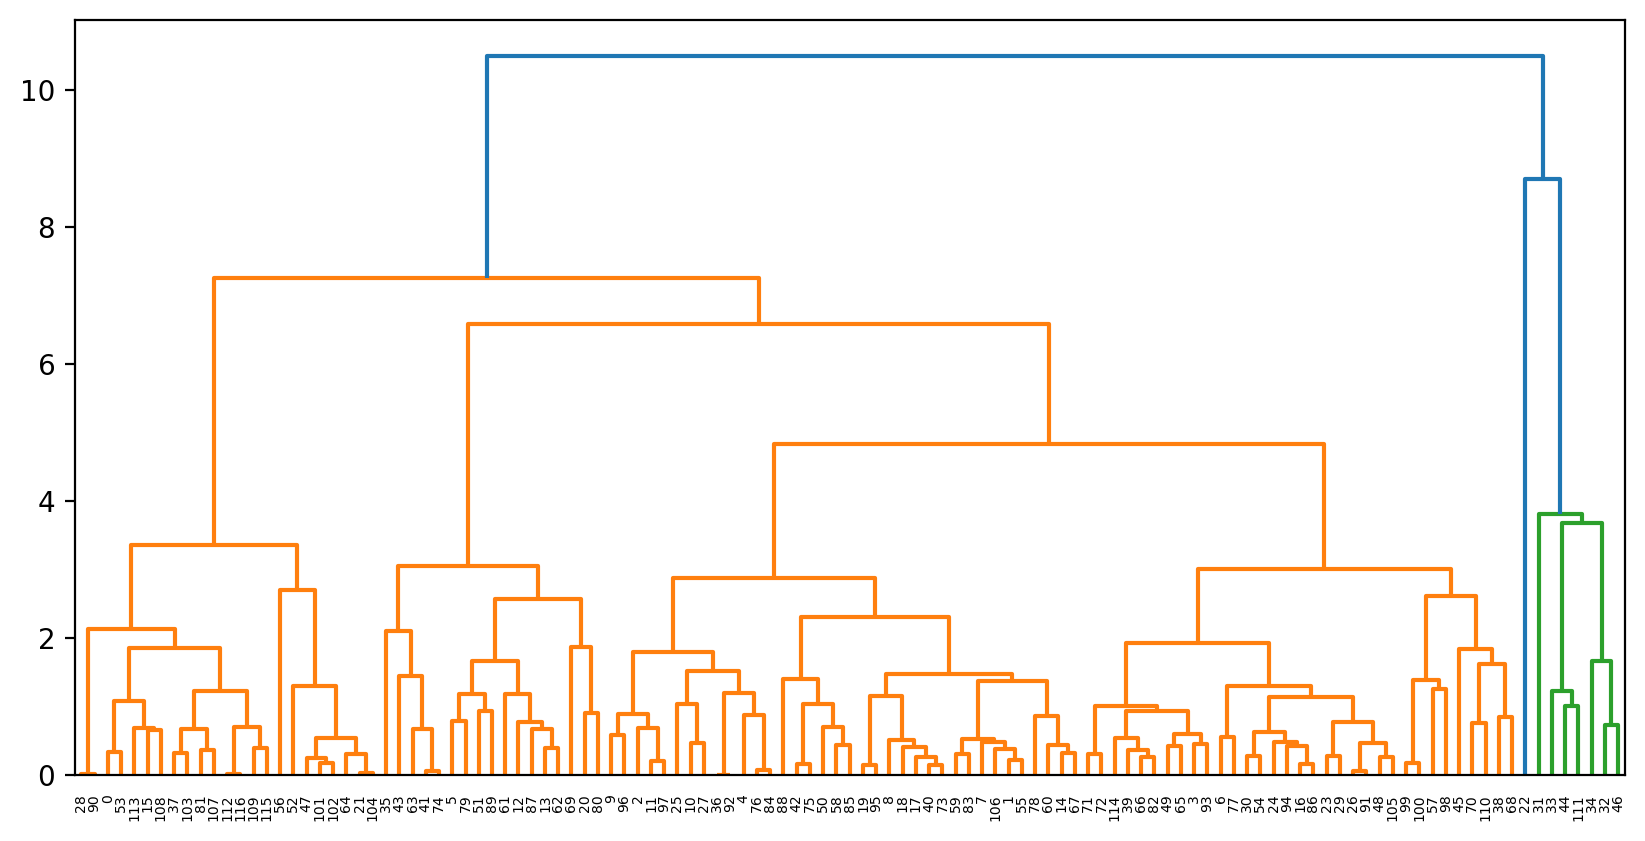

In [23]:
fig = plt.figure(figsize=(10,5),dpi=200)
dendro = hierarchy.dendrogram(Z)

> NOTE that hierarchical clustering always produce the same clustering result.

Now we insepct some of the leaves of the different clusters found to have a sense of the differences of the items  in different hierarchies.

In [24]:
df.iloc[5]

manufact      Audi
model           A8
sales         1.38
resale        39.0
type           0.0
price         62.0
engine_s       4.2
horsepow     310.0
wheelbas     113.0
width         74.0
length       198.2
curb_wgt     3.902
fuel_cap      23.7
mpg           21.0
lnsales      0.322
partition      0.0
Name: 5, dtype: object

In [25]:
df.iloc[22]

manufact     Chevrolet
model            Metro
sales           21.855
resale            5.16
type               0.0
price            9.235
engine_s           1.0
horsepow          55.0
wheelbas          93.1
width             62.6
length           149.4
curb_wgt         1.895
fuel_cap          10.3
mpg               45.0
lnsales          3.084
partition          0.0
Name: 22, dtype: object

In [26]:
df.iloc[111]

manufact           Toyota
model        Land Cruiser
sales               9.835
resale              34.08
type                  1.0
price              51.728
engine_s              4.7
horsepow            230.0
wheelbas            112.2
width                76.4
length              192.5
curb_wgt            5.115
fuel_cap             25.4
mpg                  15.0
lnsales             2.286
partition             0.0
Name: 111, dtype: object

### Cluster splitting

In [27]:
from scipy.cluster.hierarchy import fcluster

Form flat clusters from hierarchical cluster.

> Using maximum distance 

In [28]:
d_max = 3
clusters = fcluster(Z, d_max, criterion="distance")
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

> Using maximum number of clusters

In [29]:
k = 5
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

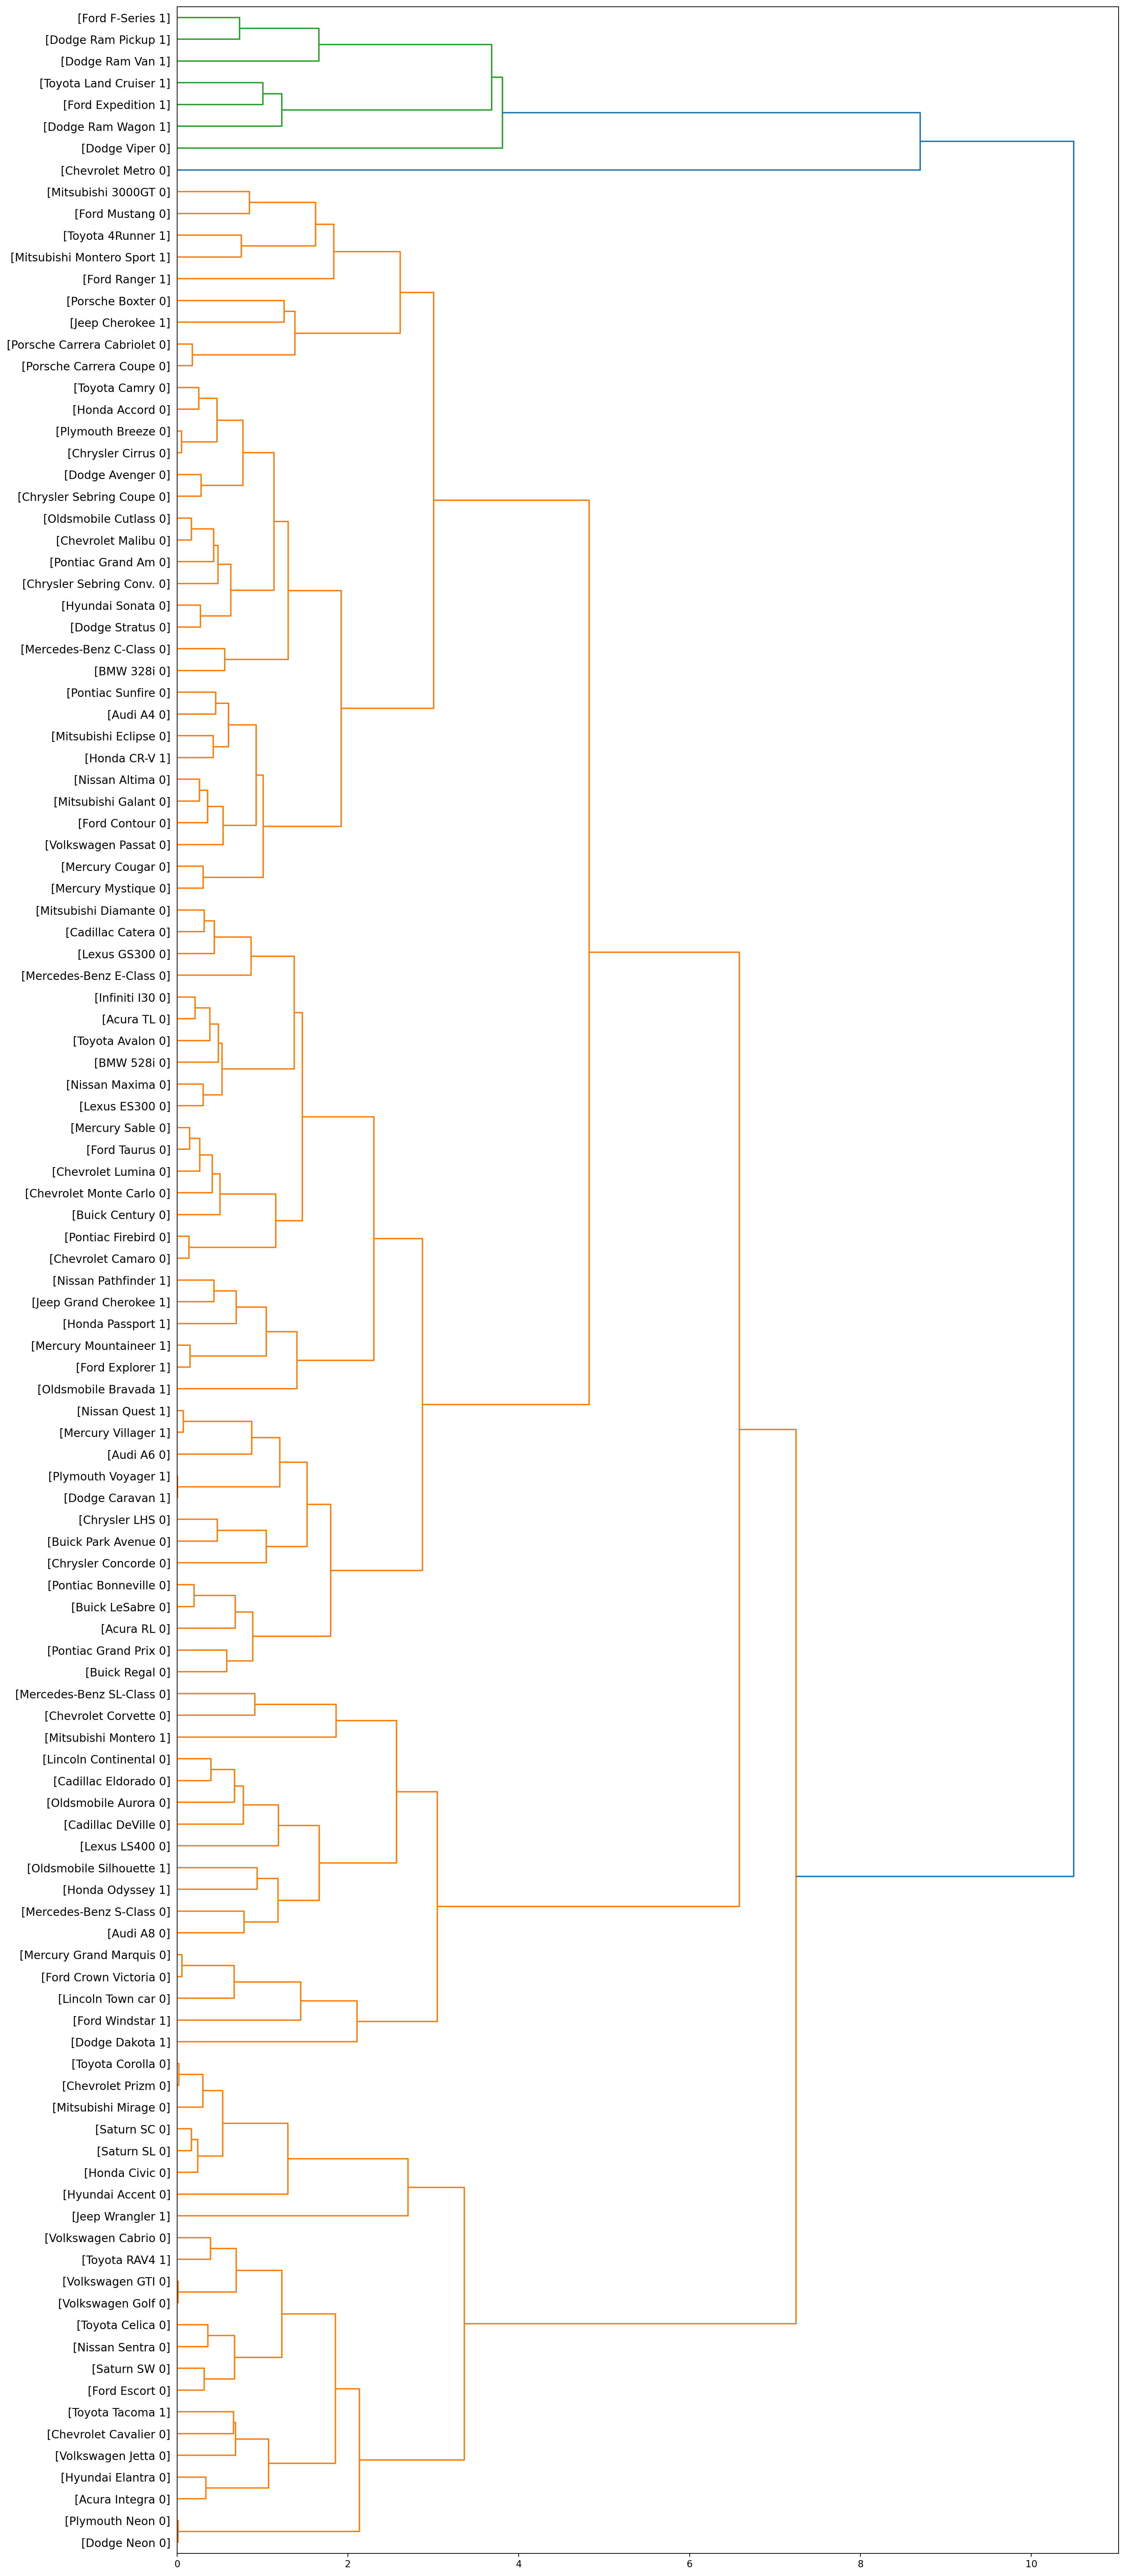

In [30]:
fig = plt.figure(figsize=(18,50),dpi=200)

def llf(id):
    """Return a text label summarising vehicle basic info based on an id"""
    
    manufacturer = df['manufact'][id]
    model = df['model'][id]
    vtype = int(float(df['type'][id]))
    
    features = (manufacturer, model, vtype)
    label_format = '[%s %s %s]'
    
    return  label_format % features

dendro = hierarchy.dendrogram(
    Z, 
    leaf_label_func=llf, 
    leaf_rotation=0, 
    leaf_font_size =12, 
    orientation = 'right'
)

### Hierarchical clustering with `scikit-learn`

In [31]:
from sklearn.metrics.pairwise import euclidean_distances

In [32]:
X = feature_matrix
D = euclidean_distances(X, X)
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [33]:
Z = hierarchy.linkage(D, "complete")

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


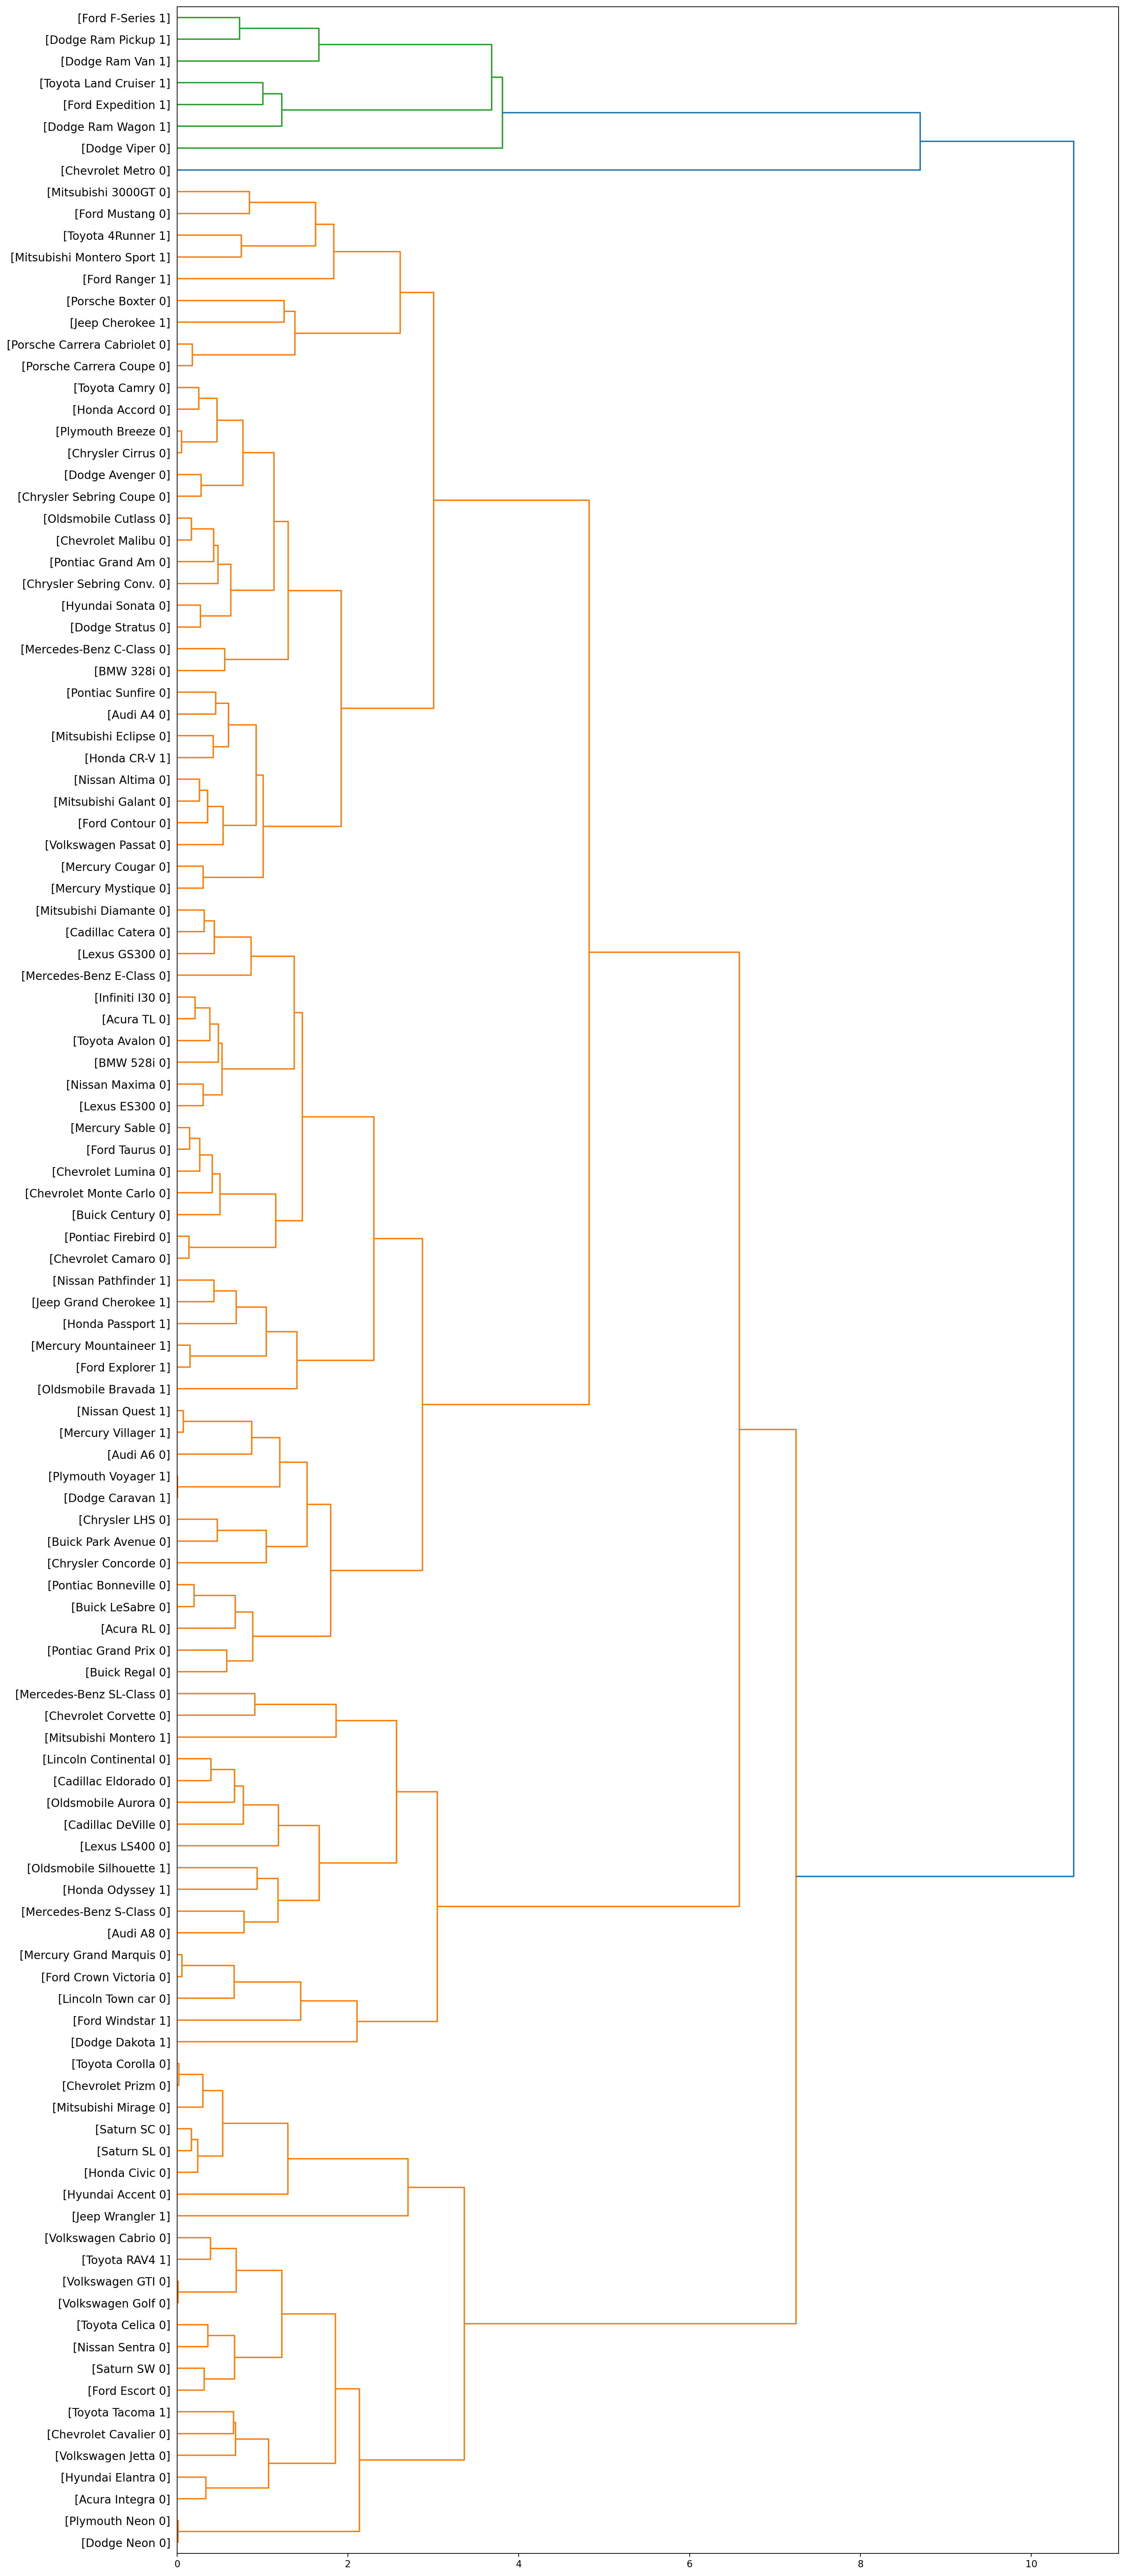

In [34]:
fig = plt.figure(figsize=(18,50),dpi=200)

def llf(id):
    """Return a text label summarising vehicle basic info based on an id"""
    
    manufacturer = df['manufact'][id]
    model = df['model'][id]
    vtype = int(float(df['type'][id]))
    
    features = (manufacturer, model, vtype)
    label_format = '[%s %s %s]'
    
    return  label_format % features

dendro = hierarchy.dendrogram(
    Z, 
    leaf_label_func=llf, 
    leaf_rotation=0, 
    leaf_font_size =12, 
    orientation = 'right'
)

### Agglomerative clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(D)

/home/ba13026/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=6)

In [37]:
agglom.labels_

array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

In [38]:
df["cluster_"] = agglom.labels_
df.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster_  
0         1  
1         2  
2         2  
3         3  
4         2

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

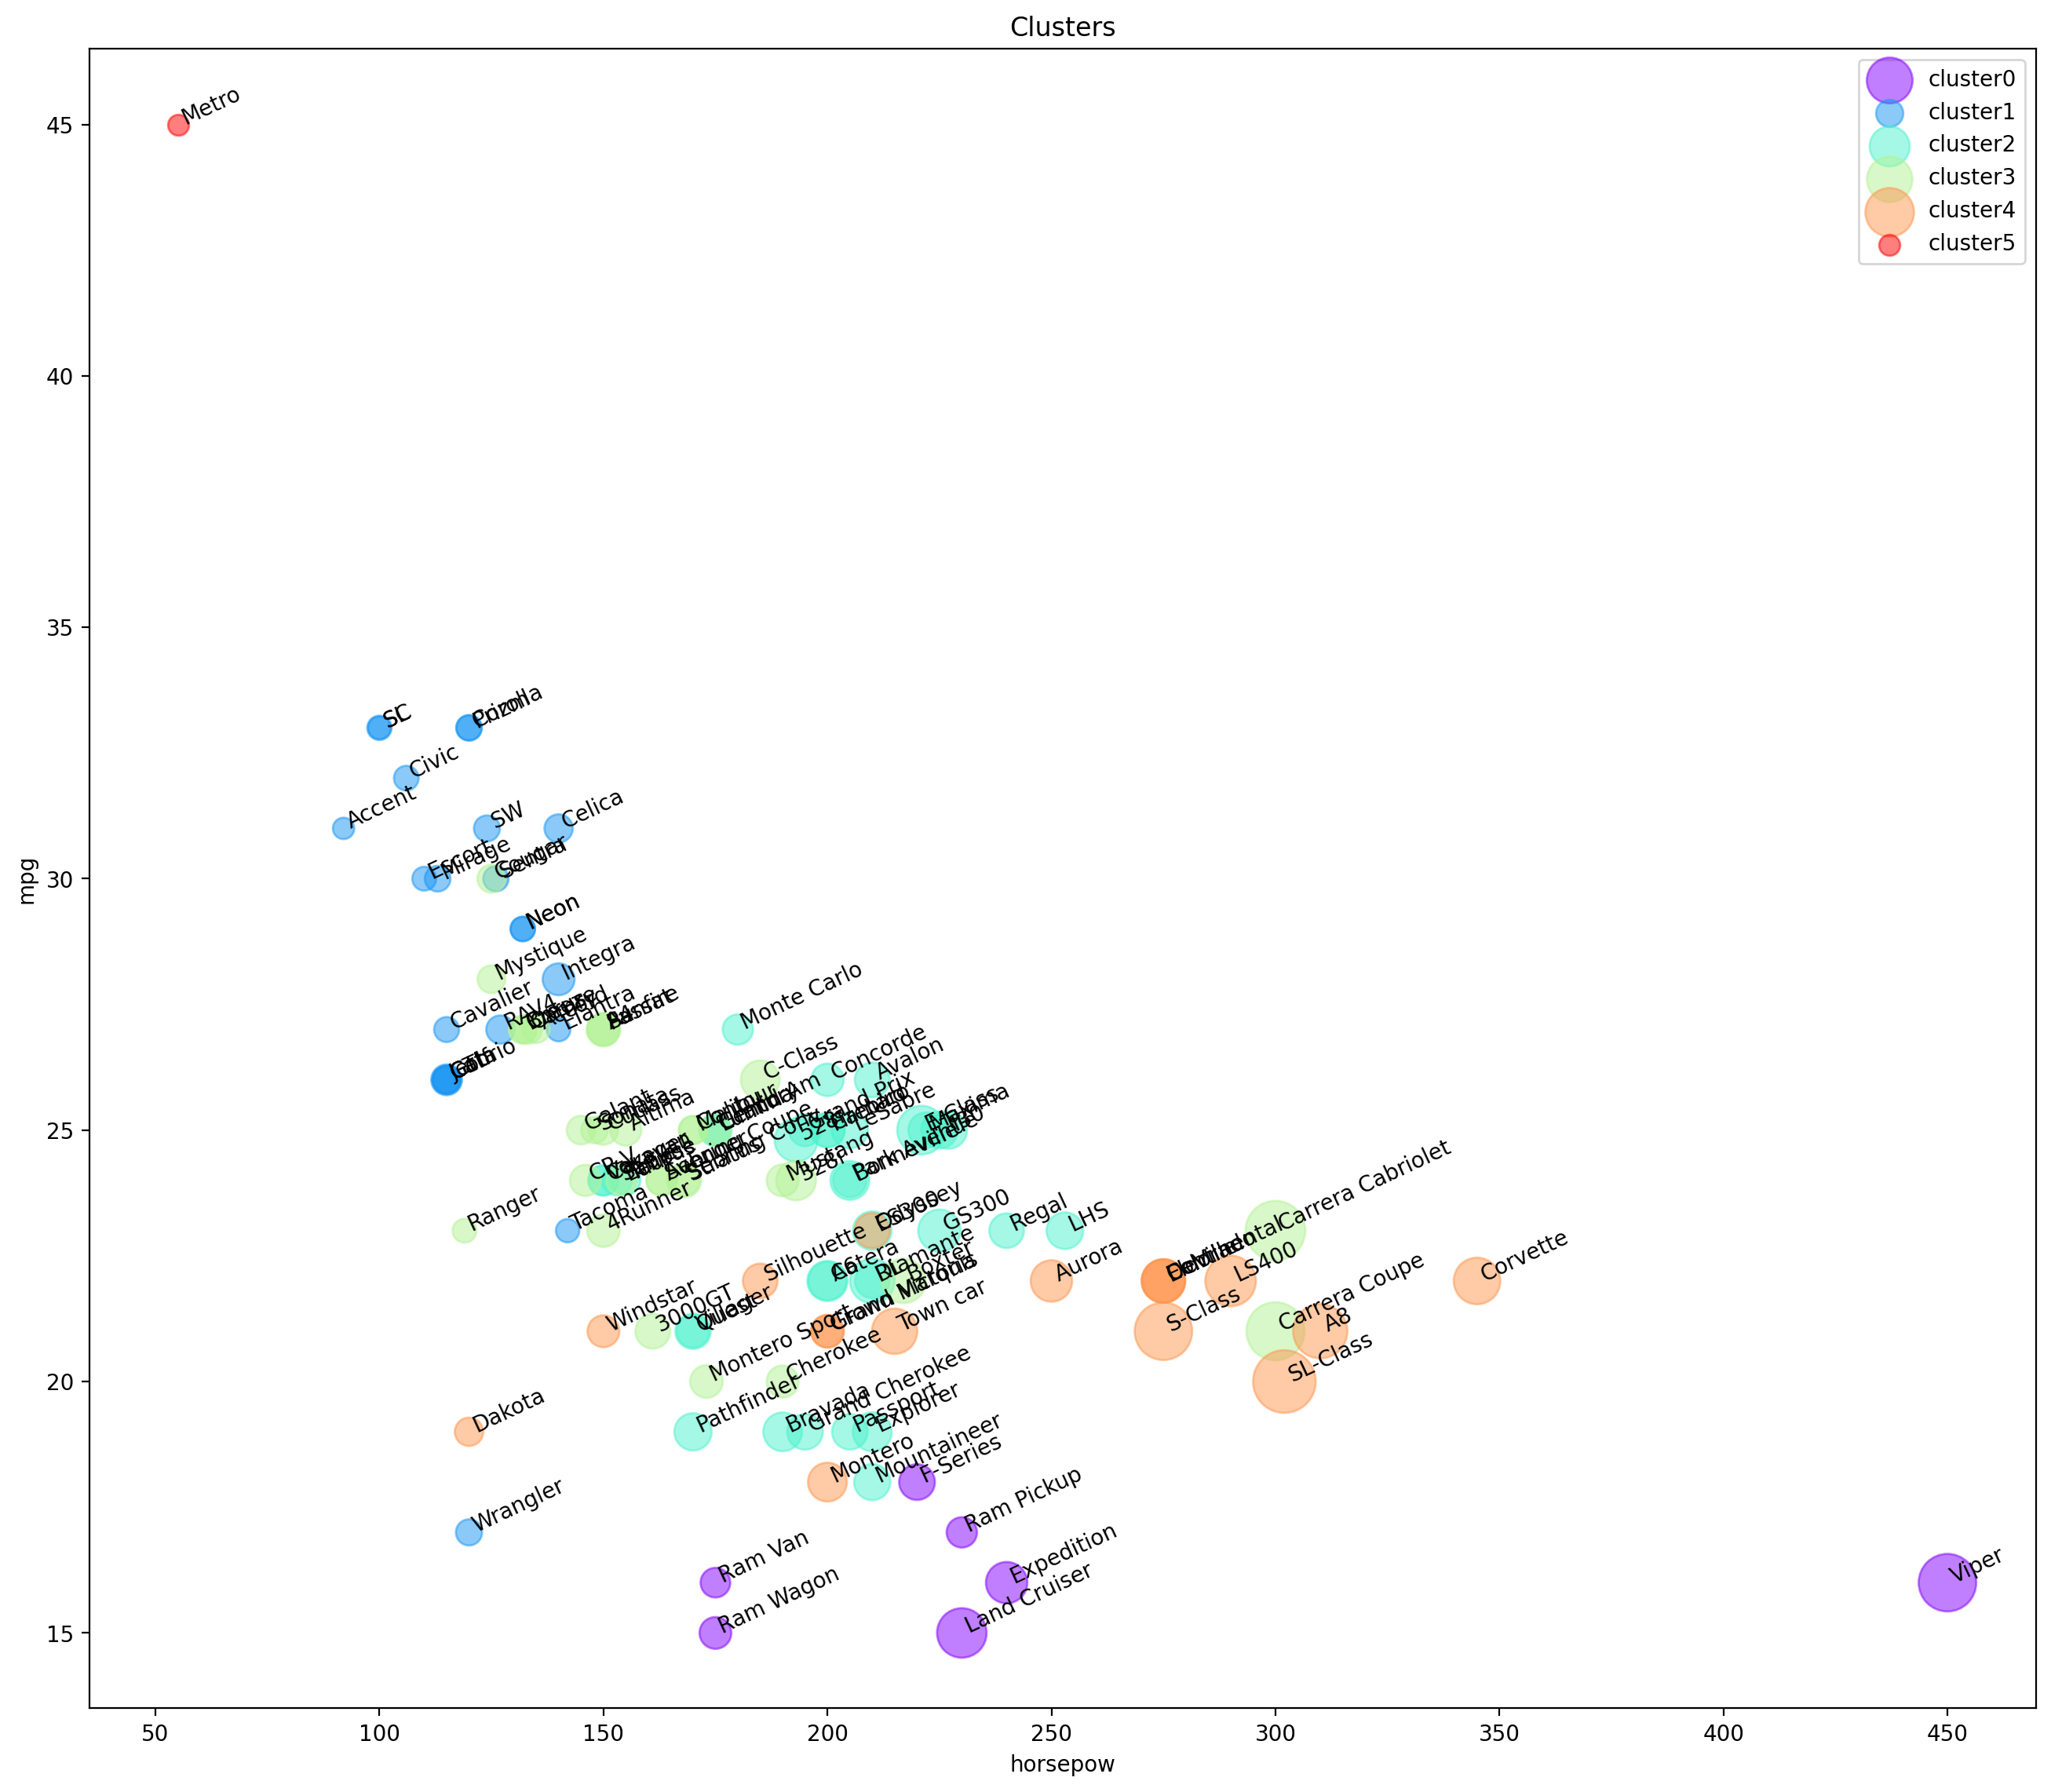

In [43]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14),dpi=200)

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

__TASK__ Group and count items in cluster and according to type

* `type` 0 corresponds to _cars_
* `type` 1 corresponds to _trucks_

In [87]:
groups = ['cluster_','type']
feature_single = 'cluster_'
df.groupby(groups)[feature_single].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

Obtain average values for selected features per group

In [88]:
groups = ['cluster_','type']
features_of_interest = ['horsepow','engine_s','mpg','price']
operation = np.mean

agg_cars = df.groupby(groups) \
            [features_of_interest] \
            .apply(operation)
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

NOTE Changed code to avoid warnings 
https://stackoverflow.com/a/61000091/11033215 

SOME OBSERVATATIONS
* Not really clear what the difference between `scipy` and `sklearn` clustering is

# Density-Based Clustering

https://onlinelibrary.wiley.com/doi/10.1002/widm.1343 (October, 2019)

# Appendix

The visualisation of the above scatter plot can be improved. Datapoints are colored according to the cluster each item belongs to and label according to model.

Importing JavaScript libraries

In [47]:
%%javascript
require.config({ 
     paths: { 
     d3: 'https://d3js.org/d3.v5.min'
}});

<IPython.core.display.Javascript object>

NOTE: `RequireJS` is a Javascript library and module loader, which is already integrated in Jupyter. Note that thiw will not work with Google Colab. 

Then to load `D3.js` we use `RequireJS` via the comman `require`

In [45]:
%%javascript
require(['d3'], function(d3) {   
     console.log(d3);
});

<IPython.core.display.Javascript object>

Accessing the output cell

In [51]:
%%javascript
element.text('hello world');

<IPython.core.display.Javascript object>

In [49]:
%%javascript
 (function(element) {
     require(['d3'], function(d3) {   
        d3.select(element.get(0)).append('text').text('hello world');
     })
 })(element);


<IPython.core.display.Javascript object>

In [59]:
%%javascript
(function(element) {
    require(['d3'], function(d3) {
        d3.select(element.get(0)).append('svg')
        .append('rect')
        .attr('width', 100)
        .attr('height', 100)
        .attr('fill', 'black')
        .on('mouseover', function(){d3.select(this).attr('fill', 'green')})
        .on('mouseout', function(){d3.select(this).attr('fill', 'black')});
    })
})(element);

<IPython.core.display.Javascript object>

SOURCE 

https://livingwithmachines.ac.uk/d3-javascript-visualisation-in-a-python-jupyter-notebook/
https://www.petercollingridge.co.uk/tutorials/svg/interactive/javascript/
